In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

# for seaborn issue:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore")

#Scikit libraries 
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import Birch
from sklearn import mixture

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#Minisom package for SOM
from minisom import MiniSom

#Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from scipy.spatial.distance import mahalanobis
from scipy.spatial.distance import seuclidean
import pickle
import dill as pickle

In [2]:
# use RandomTreesEmbedding to transform data
#hasher = RandomTreesEmbedding(n_estimators=10, random_state=0, max_depth=3,sparse_output=False)
#X_transformed = hasher.fit_transform(X)

In [3]:
#dataset = datasets.load_iris()
#X = dataset.data
#y = dataset.target

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df=pd.read_csv('/Users/sri.t/Desktop/AMEX1/Prepared_N/amex_prepared_data.csv',sep=',')
print (df.shape)

(799324, 282)


In [4]:
#df.isnull().sum()

In [5]:
#df.dtypes

In [6]:
df['MP_yes']=df['MP_yes'].fillna(value=0)
df['prod_tier']=df['prod_tier'].fillna(value='nan')
#df['IncomeCat']=df['IncomeCat'].fillna(value='nan')
#df['ACQ_TYPE']=df['ACQ_TYPE'].fillna(value='nan')
#df['acq_chn']=df['acq_chn'].fillna(value='nan')
#df['Dob']=df['Dob'].fillna(value='')
#df['PostCode']=df['PostCode'].fillna(value='')

In [7]:
#replace inf values with nan
for i in range(df.shape[1]):
    if df.iloc[:,i].dtype=='float64':
        df.iloc[:,i]=df.iloc[:,i].replace([np.inf, -np.inf], np.nan)

In [8]:
#replace nans with max of the series
for i in range(df.shape[1]):
    if ((df.iloc[:,i].dtype=='float64') | (df.iloc[:,i].dtype=='int64')):
        df.iloc[:,i]=df.iloc[:,i].fillna(value=0)

In [9]:
df1=df[df['days_active']<365]
print (df1.shape)

(138863, 282)


In [10]:
df2=df[df['days_active']>=365]

In [11]:
df2.shape

(660461, 282)

In [12]:
#df['product_description'].value_counts()

In [13]:
df2=df2[~df2['product_description'].isin(['GOLD CASHBACK','CARE','DEBT LIQUIDATION','REWARDS MAXIMIZER','DAVID JONES STORECARD TRANSFER','AFFINITY ESSENTIAL','WESTPAC PLATINUMBB','WESTPAC PLATINUM','GOLD CHOICES','WESTPAC BLACK'])]
df2.shape

(660109, 282)

In [14]:
df2['BtStatus_1'].value_counts()

0    650630
1      9479
Name: BtStatus_1, dtype: int64

In [15]:
df2['MP_yes'].value_counts()

0.0    594040
1.0     66069
Name: MP_yes, dtype: int64

In [16]:
df2['revolving_ind'].value_counts()

0.0    410516
1.0    249593
Name: revolving_ind, dtype: int64

In [17]:
df2['acct_myca_active_1'].value_counts()

0    406828
1    253281
Name: acct_myca_active_1, dtype: int64

In [18]:
df2['total_apps_count_bin'].value_counts()

low_app            659951
low_medium_app        147
medium_app              6
high_app                3
medium_high_app         2
Name: total_apps_count_bin, dtype: int64

In [19]:
df2['active_supps_log_bin'].value_counts()

low_act_supp            660089
low_medium_act_supp         12
high_act_supp                5
medium_act_supp              2
medium_high_act_supp         1
Name: active_supps_log_bin, dtype: int64

In [20]:
cols1=['detailed_fee_type', 'optout','acct_myca_active_1','prod_tier',
            'BtStatus_1','revolving_ind','MP_yes','total_apps_count_bin','active_supps_log_bin',
            'acct_spend_lcl Q1','acct_spend_lcl Q2','acct_spend_lcl Q3','acct_spend_lcl Q4',
            'acct_supp_spend_lcl Q1','acct_supp_spend_lcl Q2','acct_supp_spend_lcl Q3','acct_supp_spend_lcl Q4',
           'roc_cnt Q1','roc_cnt Q2','roc_cnt Q3','roc_cnt Q4',
           'roc_supp_cnt Q1','roc_supp_cnt Q2','roc_supp_cnt Q3','roc_supp_cnt Q4',
           'curr_bal_amt Q1','curr_bal_amt Q2','curr_bal_amt Q3','curr_bal_amt Q4',
           'LOC Q1','LOC Q2','LOC Q3','LOC Q4',
           'Gift_pnt_Q1','Gift_pnt_Q2','Gift_pnt_Q3','Gift_pnt_Q4',
           'PWP_pnt_Q1','PWP_pnt_Q2','PWP_pnt_Q3','PWP_pnt_Q4',
           'PFC_pnt_Q1','PFC_pnt_Q2','PFC_pnt_Q3','PFC_pnt_Q4',
           'VFF_pnt_Q1','VFF_pnt_Q2','VFF_pnt_Q3','VFF_pnt_Q4',
           'SPWP_pnt_Q1','SPWP_pnt_Q2','SPWP_pnt_Q3','SPWP_pnt_Q4',
           'Air_Oth_pnt_Q1','Air_Oth_pnt_Q2','Air_Oth_pnt_Q3','Air_Oth_pnt_Q4',
           'Travel_pnt_Q1','Travel_pnt_Q2','Travel_pnt_Q3','Travel_pnt_Q4',
           'Others_pnt_Q1','Others_pnt_Q2','Others_pnt_Q3','Others_pnt_Q4',
           'PWP_cnt_Q1','PWP_cnt_Q2','PWP_cnt_Q3','PWP_cnt_Q4',
           'Gift_cnt_Q1','Gift_cnt_Q2','Gift_cnt_Q3','Gift_cnt_Q4',
           'PFC_cnt_Q1','PFC_cnt_Q2','PFC_cnt_Q3','PFC_cnt_Q4',
           'VFF_cnt_Q1','VFF_cnt_Q2','VFF_cnt_Q3','VFF_cnt_Q4',
           'SPWP_cnt_Q1','SPWP_cnt_Q2','SPWP_cnt_Q3','SPWP_cnt_Q4',
           'Air_Oth_cnt_Q1','Air_Oth_cnt_Q2','Air_Oth_cnt_Q3','Air_Oth_cnt_Q4',
           'Travel_cnt_Q1','Travel_cnt_Q2','Travel_cnt_Q3','Travel_cnt_Q4',
           'Others_cnt_Q1','Others_cnt_Q2','Others_cnt_Q3','Others_cnt_Q4',
           'PWP_RdPB_Q1','PWP_RdPB_Q2','PWP_RdPB_Q3','PWP_RdPB_Q4',
           'Gift_RdPB_Q1','Gift_RdPB_Q2','Gift_RdPB_Q3','Gift_RdPB_Q4',
           'PFC_RdPB_Q1','PFC_RdPB_Q2','PFC_RdPB_Q3','PFC_RdPB_Q4',
           'VFF_RdPB_Q1','VFF_RdPB_Q2','VFF_RdPB_Q3','VFF_RdPB_Q4',
           'SPWP_RdPB_Q1','SPWP_RdPB_Q2','SPWP_RdPB_Q3','SPWP_RdPB_Q4',
           'Air_Oth_RdPB_Q1','Air_Oth_RdPB_Q2','Air_Oth_RdPB_Q3','Air_Oth_RdPB_Q4',
           'Travel_RdPB_Q1','Travel_RdPB_Q2','Travel_RdPB_Q3','Travel_RdPB_Q4',
           'Others_RdPB_Q1','Others_RdPB_Q2','Others_RdPB_Q3','Others_RdPB_Q4',
           'Retail_spend_Q1_ratio','Retail_spend_Q2_ratio','Retail_spend_Q3_ratio','Retail_spend_Q4_ratio',
           'Travel_spend_Q1_ratio','Travel_spend_Q2_ratio','Travel_spend_Q3_ratio','Travel_spend_Q4_ratio',
           'Util_spend_Q1_ratio','Util_spend_Q2_ratio','Util_spend_Q3_ratio','Util_spend_Q4_ratio',
           'PrSr_spend_Q1_ratio','PrSr_spend_Q2_ratio','PrSr_spend_Q3_ratio','PrSr_spend_Q1_ratio',
           'Ent_spend_Q1_ratio','Ent_spend_Q2_ratio','Ent_spend_Q3_ratio','Ent_spend_Q4_ratio',
           'B2B_spend_Q1_ratio','B2B_spend_Q2_ratio','B2B_spend_Q3_ratio','B2B_spend_Q4_ratio']

In [21]:
df_Mini=df2[cols1]

In [22]:
print (df_Mini.shape)

(660109, 153)


In [23]:
print (df_Mini['detailed_fee_type'].unique())
print (df_Mini['optout'].unique())
print (df_Mini['acct_myca_active_1'].unique())
print (df_Mini['prod_tier'].unique())
print (df_Mini['BtStatus_1'].unique())
print (df_Mini['revolving_ind'].unique())
print (df_Mini['total_apps_count_bin'].unique())
print (df_Mini['active_supps_log_bin'].unique())
print (df_Mini['MP_yes'].unique())

['Free For Life / No Fee' 'Full Fee' 'Unknown' 'First Year Free'
 'First Year Reduced Fee']
[ 1.  0.]
[0 1]
['nan' 'Charge' 'Mid' 'Low' 'Premium']
[0 1]
[ 0.  1.]
['low_app' 'low_medium_app' 'high_app' 'medium_app' 'medium_high_app']
['low_act_supp' 'low_medium_act_supp' 'high_act_supp' 'medium_act_supp'
 'medium_high_act_supp']
[ 0.  1.]


In [24]:
#define the columns for which dummies need to be created
cols_to_transform = ['detailed_fee_type', 'prod_tier','active_supps_log_bin','total_apps_count_bin']
df_with_dummies = pd.get_dummies(df_Mini,columns = cols_to_transform)

In [25]:
df_with_dummies.head()

,optout,acct_myca_active_1,BtStatus_1,revolving_ind,MP_yes,acct_spend_lcl Q1,acct_spend_lcl Q2,acct_spend_lcl Q3,acct_spend_lcl Q4,acct_supp_spend_lcl Q1,acct_supp_spend_lcl Q2,acct_supp_spend_lcl Q3,acct_supp_spend_lcl Q4,roc_cnt Q1,roc_cnt Q2,roc_cnt Q3,roc_cnt Q4,roc_supp_cnt Q1,roc_supp_cnt Q2,roc_supp_cnt Q3,roc_supp_cnt Q4,curr_bal_amt Q1,curr_bal_amt Q2,curr_bal_amt Q3,curr_bal_amt Q4,LOC Q1,LOC Q2,LOC Q3,LOC Q4,Gift_pnt_Q1,Gift_pnt_Q2,Gift_pnt_Q3,Gift_pnt_Q4,PWP_pnt_Q1,PWP_pnt_Q2,PWP_pnt_Q3,PWP_pnt_Q4,PFC_pnt_Q1,PFC_pnt_Q2,PFC_pnt_Q3,PFC_pnt_Q4,VFF_pnt_Q1,VFF_pnt_Q2,VFF_pnt_Q3,VFF_pnt_Q4,SPWP_pnt_Q1,SPWP_pnt_Q2,SPWP_pnt_Q3,SPWP_pnt_Q4,Air_Oth_pnt_Q1,Air_Oth_pnt_Q2,Air_Oth_pnt_Q3,Air_Oth_pnt_Q4,Travel_pnt_Q1,Travel_pnt_Q2,Travel_pnt_Q3,Travel_pnt_Q4,Others_pnt_Q1,Others_pnt_Q2,Others_pnt_Q3,Others_pnt_Q4,PWP_cnt_Q1,PWP_cnt_Q2,PWP_cnt_Q3,PWP_cnt_Q4,Gift_cnt_Q1,Gift_cnt_Q2,Gift_cnt_Q3,Gift_cnt_Q4,PFC_cnt_Q1,PFC_cnt_Q2,PFC_cnt_Q3,PFC_cnt_Q4,VFF_cnt_Q1,VFF_cnt_Q2,VFF_cnt_Q3,VFF_cnt_Q4,SPWP_cnt_Q1,SPWP_cnt_Q2,SPWP_cnt_Q3,SPWP_cnt_Q4,Air_Oth_cnt_Q1,Air_Oth_cnt_Q2,Air_Oth_cnt_Q3,Air_Oth_cnt_Q4,Travel_cnt_Q1,Travel_cnt_Q2,Travel_cnt_Q3,Travel_cnt_Q4,Others_cnt_Q1,Others_cnt_Q2,Others_cnt_Q3,Others_cnt_Q4,PWP_RdPB_Q1,PWP_RdPB_Q2,PWP_RdPB_Q3,PWP_RdPB_Q4,Gift_RdPB_Q1,Gift_RdPB_Q2,Gift_RdPB_Q3,Gift_RdPB_Q4,PFC_RdPB_Q1,PFC_RdPB_Q2,PFC_RdPB_Q3,PFC_RdPB_Q4,VFF_RdPB_Q1,VFF_RdPB_Q2,VFF_RdPB_Q3,VFF_RdPB_Q4,SPWP_RdPB_Q1,SPWP_RdPB_Q2,SPWP_RdPB_Q3,SPWP_RdPB_Q4,Air_Oth_RdPB_Q1,Air_Oth_RdPB_Q2,Air_Oth_RdPB_Q3,Air_Oth_RdPB_Q4,Travel_RdPB_Q1,Travel_RdPB_Q2,Travel_RdPB_Q3,Travel_RdPB_Q4,Others_RdPB_Q1,Others_RdPB_Q2,Others_RdPB_Q3,Others_RdPB_Q4,Retail_spend_Q1_ratio,Retail_spend_Q2_ratio,Retail_spend_Q3_ratio,Retail_spend_Q4_ratio,Travel_spend_Q1_ratio,Travel_spend_Q2_ratio,Travel_spend_Q3_ratio,Travel_spend_Q4_ratio,Util_spend_Q1_ratio,Util_spend_Q2_ratio,Util_spend_Q3_ratio,Util_spend_Q4_ratio,PrSr_spend_Q1_ratio,PrSr_spend_Q2_ratio,PrSr_spend_Q3_ratio,PrSr_spend_Q1_ratio,Ent_spend_Q1_ratio,Ent_spend_Q2_ratio,Ent_spend_Q3_ratio,Ent_spend_Q4_ratio,B2B_spend_Q1_ratio,B2B_spend_Q2_ratio,B2B_spend_Q3_ratio,B2B_spend_Q4_ratio,detailed_fee_type_First Year Free,detailed_fee_type_First Year Reduced Fee,detailed_fee_type_Free For Life / No Fee,detailed_fee_type_Full Fee,detailed_fee_type_Unknown,prod_tier_Charge,prod_tier_Low,prod_tier_Mid,prod_tier_Premium,prod_tier_nan,active_supps_log_bin_high_act_supp,active_supps_log_bin_low_act_supp,active_supps_log_bin_low_medium_act_supp,active_supps_log_bin_medium_act_supp,active_supps_log_bin_medium_high_act_supp,total_apps_count_bin_high_app,total_apps_count_bin_low_app,total_apps_count_bin_low_medium_app,total_apps_count_bin_medium_app,total_apps_count_bin_medium_high_app
0,1.0,0,0,0.0,0.0,257.666667,7.666667,91.000000,257.666667,0.0,0.0,0.0,0.0,2.333333,0.333333,1.000000,2.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
1,0.0,1,0,0.0,0.0,5583.000000,4619.666667,4378.333333,6347.666667,0.0,0.0,0.0,0.0,68.000000,46.333333,59.666667,59.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [26]:
#df_with_dummies.isnull().sum()

In [27]:
cols=['acct_spend_lcl Q1','acct_spend_lcl Q2','acct_spend_lcl Q3','acct_spend_lcl Q4',
            'acct_supp_spend_lcl Q1','acct_supp_spend_lcl Q2','acct_supp_spend_lcl Q3','acct_supp_spend_lcl Q4',
           'roc_cnt Q1','roc_cnt Q2','roc_cnt Q3','roc_cnt Q4',
           'roc_supp_cnt Q1','roc_supp_cnt Q2','roc_supp_cnt Q3','roc_supp_cnt Q4',
           'curr_bal_amt Q1','curr_bal_amt Q2','curr_bal_amt Q3','curr_bal_amt Q4',
           'LOC Q1','LOC Q2','LOC Q3','LOC Q4',
           'Gift_pnt_Q1','Gift_pnt_Q2','Gift_pnt_Q3','Gift_pnt_Q4',
           'PWP_pnt_Q1','PWP_pnt_Q2','PWP_pnt_Q3','PWP_pnt_Q4',
           'PFC_pnt_Q1','PFC_pnt_Q2','PFC_pnt_Q3','PFC_pnt_Q4',
           'VFF_pnt_Q1','VFF_pnt_Q2','VFF_pnt_Q3','VFF_pnt_Q4',
           'SPWP_pnt_Q1','SPWP_pnt_Q2','SPWP_pnt_Q3','SPWP_pnt_Q4',
           'Air_Oth_pnt_Q1','Air_Oth_pnt_Q2','Air_Oth_pnt_Q3','Air_Oth_pnt_Q4',
           'Travel_pnt_Q1','Travel_pnt_Q2','Travel_pnt_Q3','Travel_pnt_Q4',
           'Others_pnt_Q1','Others_pnt_Q2','Others_pnt_Q3','Others_pnt_Q4',
           'PWP_cnt_Q1','PWP_cnt_Q2','PWP_cnt_Q3','PWP_cnt_Q4',
           'Gift_cnt_Q1','Gift_cnt_Q2','Gift_cnt_Q3','Gift_cnt_Q4',
           'PFC_cnt_Q1','PFC_cnt_Q2','PFC_cnt_Q3','PFC_cnt_Q4',
           'VFF_cnt_Q1','VFF_cnt_Q2','VFF_cnt_Q3','VFF_cnt_Q4',
           'SPWP_cnt_Q1','SPWP_cnt_Q2','SPWP_cnt_Q3','SPWP_cnt_Q4',
           'Air_Oth_cnt_Q1','Air_Oth_cnt_Q2','Air_Oth_cnt_Q3','Air_Oth_cnt_Q4',
           'Travel_cnt_Q1','Travel_cnt_Q2','Travel_cnt_Q3','Travel_cnt_Q4',
           'Others_cnt_Q1','Others_cnt_Q2','Others_cnt_Q3','Others_cnt_Q4',
           'PWP_RdPB_Q1','PWP_RdPB_Q2','PWP_RdPB_Q3','PWP_RdPB_Q4',
           'Gift_RdPB_Q1','Gift_RdPB_Q2','Gift_RdPB_Q3','Gift_RdPB_Q4',
           'PFC_RdPB_Q1','PFC_RdPB_Q2','PFC_RdPB_Q3','PFC_RdPB_Q4',
           'VFF_RdPB_Q1','VFF_RdPB_Q2','VFF_RdPB_Q3','VFF_RdPB_Q4',
           'SPWP_RdPB_Q1','SPWP_RdPB_Q2','SPWP_RdPB_Q3','SPWP_RdPB_Q4',
           'Air_Oth_RdPB_Q1','Air_Oth_RdPB_Q2','Air_Oth_RdPB_Q3','Air_Oth_RdPB_Q4',
           'Travel_RdPB_Q1','Travel_RdPB_Q2','Travel_RdPB_Q3','Travel_RdPB_Q4',
           'Others_RdPB_Q1','Others_RdPB_Q2','Others_RdPB_Q3','Others_RdPB_Q4',
           'Retail_spend_Q1_ratio','Retail_spend_Q2_ratio','Retail_spend_Q3_ratio','Retail_spend_Q4_ratio',
           'Travel_spend_Q1_ratio','Travel_spend_Q2_ratio','Travel_spend_Q3_ratio','Travel_spend_Q4_ratio',
           'Util_spend_Q1_ratio','Util_spend_Q2_ratio','Util_spend_Q3_ratio','Util_spend_Q4_ratio',
           'PrSr_spend_Q1_ratio','PrSr_spend_Q2_ratio','PrSr_spend_Q3_ratio','PrSr_spend_Q1_ratio',
           'Ent_spend_Q1_ratio','Ent_spend_Q2_ratio','Ent_spend_Q3_ratio','Ent_spend_Q4_ratio',
           'B2B_spend_Q1_ratio','B2B_spend_Q2_ratio','B2B_spend_Q3_ratio','B2B_spend_Q4_ratio']

In [28]:
scalar=StandardScaler()
normal=Normalizer()

In [29]:
scalar.fit(df_with_dummies[cols])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
pickle.dump(scalar, open('standardization_of_data_1year', 'wb'))

In [31]:
mod=pickle.load(open('standardization_of_data_1year', 'rb'))

In [32]:
df_with_dummies[cols]=mod.transform(df_with_dummies[cols])

In [33]:
df_with_dummies.head()

,optout,acct_myca_active_1,BtStatus_1,revolving_ind,MP_yes,acct_spend_lcl Q1,acct_spend_lcl Q2,acct_spend_lcl Q3,acct_spend_lcl Q4,acct_supp_spend_lcl Q1,acct_supp_spend_lcl Q2,acct_supp_spend_lcl Q3,acct_supp_spend_lcl Q4,roc_cnt Q1,roc_cnt Q2,roc_cnt Q3,roc_cnt Q4,roc_supp_cnt Q1,roc_supp_cnt Q2,roc_supp_cnt Q3,roc_supp_cnt Q4,curr_bal_amt Q1,curr_bal_amt Q2,curr_bal_amt Q3,curr_bal_amt Q4,LOC Q1,LOC Q2,LOC Q3,LOC Q4,Gift_pnt_Q1,Gift_pnt_Q2,Gift_pnt_Q3,Gift_pnt_Q4,PWP_pnt_Q1,PWP_pnt_Q2,PWP_pnt_Q3,PWP_pnt_Q4,PFC_pnt_Q1,PFC_pnt_Q2,PFC_pnt_Q3,PFC_pnt_Q4,VFF_pnt_Q1,VFF_pnt_Q2,VFF_pnt_Q3,VFF_pnt_Q4,SPWP_pnt_Q1,SPWP_pnt_Q2,SPWP_pnt_Q3,SPWP_pnt_Q4,Air_Oth_pnt_Q1,Air_Oth_pnt_Q2,Air_Oth_pnt_Q3,Air_Oth_pnt_Q4,Travel_pnt_Q1,Travel_pnt_Q2,Travel_pnt_Q3,Travel_pnt_Q4,Others_pnt_Q1,Others_pnt_Q2,Others_pnt_Q3,Others_pnt_Q4,PWP_cnt_Q1,PWP_cnt_Q2,PWP_cnt_Q3,PWP_cnt_Q4,Gift_cnt_Q1,Gift_cnt_Q2,Gift_cnt_Q3,Gift_cnt_Q4,PFC_cnt_Q1,PFC_cnt_Q2,PFC_cnt_Q3,PFC_cnt_Q4,VFF_cnt_Q1,VFF_cnt_Q2,VFF_cnt_Q3,VFF_cnt_Q4,SPWP_cnt_Q1,SPWP_cnt_Q2,SPWP_cnt_Q3,SPWP_cnt_Q4,Air_Oth_cnt_Q1,Air_Oth_cnt_Q2,Air_Oth_cnt_Q3,Air_Oth_cnt_Q4,Travel_cnt_Q1,Travel_cnt_Q2,Travel_cnt_Q3,Travel_cnt_Q4,Others_cnt_Q1,Others_cnt_Q2,Others_cnt_Q3,Others_cnt_Q4,PWP_RdPB_Q1,PWP_RdPB_Q2,PWP_RdPB_Q3,PWP_RdPB_Q4,Gift_RdPB_Q1,Gift_RdPB_Q2,Gift_RdPB_Q3,Gift_RdPB_Q4,PFC_RdPB_Q1,PFC_RdPB_Q2,PFC_RdPB_Q3,PFC_RdPB_Q4,VFF_RdPB_Q1,VFF_RdPB_Q2,VFF_RdPB_Q3,VFF_RdPB_Q4,SPWP_RdPB_Q1,SPWP_RdPB_Q2,SPWP_RdPB_Q3,SPWP_RdPB_Q4,Air_Oth_RdPB_Q1,Air_Oth_RdPB_Q2,Air_Oth_RdPB_Q3,Air_Oth_RdPB_Q4,Travel_RdPB_Q1,Travel_RdPB_Q2,Travel_RdPB_Q3,Travel_RdPB_Q4,Others_RdPB_Q1,Others_RdPB_Q2,Others_RdPB_Q3,Others_RdPB_Q4,Retail_spend_Q1_ratio,Retail_spend_Q2_ratio,Retail_spend_Q3_ratio,Retail_spend_Q4_ratio,Travel_spend_Q1_ratio,Travel_spend_Q2_ratio,Travel_spend_Q3_ratio,Travel_spend_Q4_ratio,Util_spend_Q1_ratio,Util_spend_Q2_ratio,Util_spend_Q3_ratio,Util_spend_Q4_ratio,PrSr_spend_Q1_ratio,PrSr_spend_Q2_ratio,PrSr_spend_Q3_ratio,PrSr_spend_Q1_ratio,Ent_spend_Q1_ratio,Ent_spend_Q2_ratio,Ent_spend_Q3_ratio,Ent_spend_Q4_ratio,B2B_spend_Q1_ratio,B2B_spend_Q2_ratio,B2B_spend_Q3_ratio,B2B_spend_Q4_ratio,detailed_fee_type_First Year Free,detailed_fee_type_First Year Reduced Fee,detailed_fee_type_Free For Life / No Fee,detailed_fee_type_Full Fee,detailed_fee_type_Unknown,prod_tier_Charge,prod_tier_Low,prod_tier_Mid,prod_tier_Premium,prod_tier_nan,active_supps_log_bin_high_act_supp,active_supps_log_bin_low_act_supp,active_supps_log_bin_low_medium_act_supp,active_supps_log_bin_medium_act_supp,active_supps_log_bin_medium_high_act_supp,total_apps_count_bin_high_app,total_apps_count_bin_low_app,total_apps_count_bin_low_medium_app,total_apps_count_bin_medium_app,total_apps_count_bin_medium_high_app
0,1.0,0,0,0.0,0.0,-0.177066,-0.189059,-0.195332,-0.201916,-0.086348,-0.077674,-0.077844,-0.1005,-0.451294,-0.514697,-0.514382,-0.506496,-0.257733,-0.201188,-0.243522,-0.300985,-0.481014,-0.472758,-0.47139,-0.496848,-0.558218,-0.558218,-0.558218,-0.558218,-0.017015,-0.006695,-0.017182,-0.016765,-0.040822,-0.043555,-0.034669,-0.044112,-0.046177,-0.048949,-0.028436,-0.043206,-0.042365,-0.059122,-0.041443,-0.046059,-0.038557,-0.037022,-0.032657,-0.042654,-0.059504,-0.053717,-0.058404,-0.060029,-0.045219,-0.041602,-0.047864,-0.03732,-0.064581,-0.058491,-0.057904,-0.068605,-0.060619,-0.065906,-0.056682,-0.068051,-0.035206,-0.035771,-0.035202,-0.035611,-0.085628,-0.085403,-0.069334,-0.080434,-0.085862,-0.129358,-0.10072,-0.104789,-0.073954,-0.07719,-0.076986,-0.077273,-0.204022,-0.2005,-0.197444,-0.200979,-0.083098,-0.09251,-0.097026,-0.086177,-0.084221,-0.089441,-0.088082,-0.097599,-0.057047,-0.062696,-0.053147,-0.06507,-0.034092,-0.034135,-0.033864,-0.034219,-0.096576,-0.094686,-0.090131,-0.093522,-0.086077,-0.125529,-0.09791,-0.101288,-0.113821,-0.115272,-0.110351,-0.123519,-0.199113,-0.195825,-0.193546,-0.194828,-0.080397,-0.086232,-0.090645,-0.082922,-0.110167,-0.111211,-0.119723,-0.139013,1.955945,1.914872,1.986612,1.788057,-0.559786,-0.55

In [34]:
df_matrix=df_with_dummies.values
print (df_with_dummies.shape)

(660109, 169)


In [35]:
#df_with_dummies.to_csv("/Users/sri.t/Desktop/AMEX1/Prepared_N/SOM_data.csv",header=True,sep=',',encoding='utf-8')

In [36]:
# Initialization and training
som1_3 = MiniSom(10, 10, len(df_matrix[0,:]), sigma=1.0, learning_rate=0.01)
som1_3.random_weights_init(df_matrix)
print("Training...")
som1_3.train_batch(df_matrix, 50000) # batch training
#som.train_random(df_matrix, 10000)  # random training
print("\n...ready!")
pickle.dump(som1_3, open('SOM_10*10_Model1_1year', 'wb'))

Training...

...ready!


In [37]:
# Initialization and training
som1_4 = MiniSom(10, 10, len(df_matrix[0,:]), sigma=1.0, learning_rate=0.01)
som1_4.random_weights_init(df_matrix)
print("Training...")
som1_4.train_batch(df_matrix, 100000) # batch training
#som.train_random(df_matrix, 10000)  # random training
print("\n...ready!")
pickle.dump(som1_4, open('SOM_10*10_Model2_1year', 'wb'))

Training...

...ready!


In [38]:
# Initialization and training
som2_3 = MiniSom(20, 20, len(df_matrix[0,:]), sigma=1.0, learning_rate=0.01)
som2_3.random_weights_init(df_matrix)
print("Training...")
som2_3.train_batch(df_matrix, 50000)  # batch training
print("\n...ready!")
pickle.dump(som2_3, open('SOM_20*20_Model1_1year', 'wb'))

Training...

...ready!


In [39]:
# Initialization and training
som2_4 = MiniSom(20, 20, len(df_matrix[0,:]), sigma=1.0, learning_rate=0.01)
som2_4.random_weights_init(df_matrix)
print("Training...")
som2_4.train_batch(df_matrix, 100000)  # batch training
print("\n...ready!")
pickle.dump(som2_4, open('SOM_20*20_Model2_1year', 'wb'))

Training...

...ready!


In [40]:
#Number of times each neuron was activiated for each data sample
#som.activation_response(df_matrix)

In [41]:
mod1=pickle.load(open('SOM_10*10_Model1_1year', 'rb'))
win1_3 = []
for i,j in enumerate(df_matrix):
    win1_3.append(mod1.winner(j))
    
win1_3_arr=np.array(win1_3)

In [42]:
# get the node assoicated with data sample
mod2=pickle.load(open('SOM_10*10_Model2_1year', 'rb'))
win1_4 = []
for i,j in enumerate(df_matrix):
    win1_4.append(mod2.winner(j))
    
win1_4_arr=np.array(win1_4)

In [43]:
# get the node assoicated with data sample
mod3=pickle.load(open('SOM_20*20_Model1_1year', 'rb'))
win2_3 = []
for i,j in enumerate(df_matrix):
    win2_3.append(mod3.winner(j))
    
win2_3_arr=np.array(win2_3)

In [44]:
# get the node assoicated with data sample
mod4=pickle.load(open('SOM_20*20_Model2_1year', 'rb'))
win2_4 = []
for i,j in enumerate(df_matrix):
    win2_4.append(mod4.winner(j))
    
win2_4_arr=np.array(win2_4)

In [45]:
#qnt=som.quantization(data)
#som.distance_map()

In [46]:
#wgt=som.get_weights()
#print (wgt.shape)

In [47]:
#Normalize data for Gaussian Mixture Models

normal.fit(win1_3_arr)
pickle.dump(normal, open('Normalize_10*10_SOM grid1_1year', 'wb'))
mod5=pickle.load(open('Normalize_10*10_SOM grid1_1year', 'rb'))
win1_3_arr_norm=mod5.transform(win1_3_arr)

normal.fit(win1_4_arr)
pickle.dump(normal, open('Normalize_10*10_SOM grid2_1year', 'wb'))
mod6=pickle.load(open('Normalize_10*10_SOM grid2_1year', 'rb'))
win1_4_arr_norm=mod6.transform(win1_4_arr)

normal.fit(win2_3_arr)
pickle.dump(normal, open('Normalize_20*20_SOM grid1_1year', 'wb'))
mod7=pickle.load(open('Normalize_20*20_SOM grid1_1year', 'rb'))
win2_3_arr_norm=mod7.transform(win2_3_arr)

normal.fit(win2_4_arr)
pickle.dump(normal, open('Normalize_20*20_SOM grid2_1year', 'wb'))
mod8=pickle.load(open('Normalize_20*20_SOM grid2_1year', 'rb'))
win2_4_arr_norm=mod8.transform(win2_4_arr)

In [48]:
#Gaussian Mixtures on top of 10*10 SOM for different iterations sizes
dpgmm1_3 = mixture.BayesianGaussianMixture(n_components=10, covariance_type='full',weight_concentration_prior=0.01).fit(win1_3_arr_norm)
pickle.dump(dpgmm1_3, open('SOM_10*10_GMM_Model1_1year', 'wb'))

dpgmm1_4 = mixture.BayesianGaussianMixture(n_components=10, covariance_type='full',weight_concentration_prior=0.01).fit(win1_4_arr_norm)
pickle.dump(dpgmm1_4, open('SOM_10*10_GMM_Model2_1year', 'wb'))

In [49]:
#Gaussian Mixtures on top of 20*20 SOM for different iterations sizes

dpgmm2_3 = mixture.BayesianGaussianMixture(n_components=10, covariance_type='full',weight_concentration_prior=0.01).fit(win2_3_arr_norm)
pickle.dump(dpgmm2_3, open('SOM_20*20_GMM_Model1_1year', 'wb'))

dpgmm2_4 = mixture.BayesianGaussianMixture(n_components=10, covariance_type='full',weight_concentration_prior=0.01).fit(win2_4_arr_norm)
pickle.dump(dpgmm2_4, open('SOM_20*20_GMM_Model2_1year', 'wb'))

In [50]:
#Get the labels
#10*10 SOM and GMM for different training lengths

mod9=pickle.load(open('SOM_10*10_GMM_Model1_1year', 'rb'))
labels_d_1_3 = mod9.predict(win1_3_arr_norm)

mod10=pickle.load(open('SOM_10*10_GMM_Model2_1year', 'rb'))
labels_d_1_4 = mod10.predict(win1_4_arr_norm)

#20*20 SOM and GMM for different training lengths

mod11=pickle.load(open('SOM_20*20_GMM_Model1_1year', 'rb'))
labels_d_2_3 = mod11.predict(win2_3_arr_norm)

mod12=pickle.load(open('SOM_20*20_GMM_Model2_1year', 'rb'))
labels_d_2_4 = mod12.predict(win2_4_arr_norm)

In [51]:
print ("10*10 SOM AND GMM FOR DIFFERENT TRAINING ITERATIONS")
print (np.unique(labels_d_1_3))
print (np.unique(labels_d_1_4))

print ("20*20 SOM AND GMM FOR DIFFERENT TRAINING ITERATIONS")
print (np.unique(labels_d_2_3))
print (np.unique(labels_d_2_4))

10*10 SOM AND GMM FOR DIFFERENT TRAINING ITERATIONS
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
20*20 SOM AND GMM FOR DIFFERENT TRAINING ITERATIONS
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [52]:
unique, counts1_3 = np.unique(labels_d_1_3, return_counts=True)
unique, counts1_4 = np.unique(labels_d_1_4, return_counts=True)

unique, counts2_3 = np.unique(labels_d_2_3, return_counts=True)
unique, counts2_4 = np.unique(labels_d_2_4, return_counts=True)

d=pd.DataFrame([unique, counts1_3,counts1_4,counts2_3,counts2_4]).T
print (d)

   0       1       2       3       4
0  0   25647  176741   58264  104117
1  1  396782   83420   77290   69936
2  2   65724   53625   26896   47049
3  3   13645   11126  205365   30203
4  4   29739   73818    3012    5977
5  5   19524   37165   44469   80839
6  6   23003   90949   39755   64507
7  7   45974   96182   54486  105212
8  8   17718   22265   13028   88349
9  9   22353   14818  137544   63920


In [61]:
print ("10*10 SOM AND GMM FOR DIFFERENT TRAINING ITERATIONS")
print (metrics.silhouette_score(win1_3_arr_norm, labels_d_1_3, metric='mahalanobis',sample_size=40000,random_state=np.random.seed(10)))
print (metrics.silhouette_score(win1_4_arr_norm, labels_d_1_4, metric='mahalanobis',sample_size=40000,random_state=np.random.seed(10)))

print ("20*20 SOM AND GMM FOR DIFFERENT TRAINING ITERATIONS")

print (metrics.silhouette_score(win2_3_arr_norm, labels_d_2_3, metric='mahalanobis',sample_size=40000,random_state=np.random.seed(10)))
print (metrics.silhouette_score(win2_4_arr_norm, labels_d_2_4, metric='mahalanobis',sample_size=40000,random_state=np.random.seed(10)))

10*10 SOM AND GMM FOR DIFFERENT TRAINING ITERATIONS
0.913369775428
0.781097107794
20*20 SOM AND GMM FOR DIFFERENT TRAINING ITERATIONS
0.683816352224
0.659809225014


In [62]:
print ("10*10 SOM AND GMM FOR DIFFERENT TRAINING ITERATIONS")
print (metrics.silhouette_score(win1_3_arr_norm, labels_d_1_3, metric='euclidean',sample_size=40000,random_state=np.random.seed(10)))
print (metrics.silhouette_score(win1_3_arr_norm, labels_d_1_3, metric='seuclidean',sample_size=40000,random_state=np.random.seed(10)))
print ("20*20 SOM AND GMM FOR DIFFERENT TRAINING ITERATIONS")
print (metrics.silhouette_score(win2_3_arr_norm, labels_d_2_3, metric='euclidean',sample_size=40000,random_state=np.random.seed(10)))
print (metrics.silhouette_score(win2_3_arr_norm, labels_d_2_3, metric='seuclidean',sample_size=40000,random_state=np.random.seed(10)))

10*10 SOM AND GMM FOR DIFFERENT TRAINING ITERATIONS
0.915530720702
0.914737380658
20*20 SOM AND GMM FOR DIFFERENT TRAINING ITERATIONS
0.6893041048
0.689036580469


In [63]:
#print (metrics.calinski_harabaz_score(win1_3_arr_norm, labels_d_1_3, metric='mahalanobis'))
#print (metrics.calinski_harabaz_score(win2_3_arr_norm, labels_d_2_3, metric='mahalanobis'))

In [54]:
df2['cluster_label_10_1']=labels_d_1_3
df2['cluster_label_10_2']=labels_d_1_4

df2['cluster_label_20_1']=labels_d_2_3
df2['cluster_label_20_2']=labels_d_2_4

In [55]:
cols_tokeep=['LAV_ID1','cluster_label_10_1','cluster_label_10_2','cluster_label_20_1','cluster_label_20_2']

In [56]:
df2_1=df2[cols_tokeep]
print (df2_1.shape)

(660109, 5)


In [57]:
df3=df.merge(df2_1,on='LAV_ID1',how='left')
print(df3.shape)

(799324, 286)


In [64]:
#df3.isnull().sum()

In [58]:
df3['cluster_label_10_1']=df3['cluster_label_10_1'].fillna(value=999)
df3['cluster_label_10_2']=df3['cluster_label_10_2'].fillna(value=999)

df3['cluster_label_20_1']=df3['cluster_label_20_1'].fillna(value=999)
df3['cluster_label_20_2']=df3['cluster_label_20_2'].fillna(value=999)

In [59]:
df3.head()

,LAV_ID1,Gender,IncomeCat,ACQ_TYPE,acq_chn,detailed_fee_type,product_description,days_active,estab_dt,MR_Source_Code,Income,Dob,PostCode,CHANNEL,optout,prod_tier,SuppStatus,AgeCat,myca_app_ind_1,acct_myca_active_1,myca_active_mob_1,acct_spend_lcl Q1,acct_spend_lcl Q2,acct_spend_lcl Q3,acct_spend_lcl Q4,acct_supp_spend_lcl Q1,acct_supp_spend_lcl Q2,acct_supp_spend_lcl Q3,acct_supp_spend_lcl Q4,roc_cnt Q1,roc_cnt Q2,roc_cnt Q3,roc_cnt Q4,roc_supp_cnt Q1,roc_supp_cnt Q2,roc_supp_cnt Q3,roc_supp_cnt Q4,Mean_apps_logs_month,BtStatus_1,Mean_act_supp_month,curr_bal_amt Q1,curr_bal_amt Q2,curr_bal_amt Q3,curr_bal_amt Q4,LOC Q1,LOC Q2,LOC Q3,LOC Q4,Mean_myca_logs_month,revolving_ind,total_apps_count_bin,days_active_bin,active_supps_log_bin,Retail_spend_Q1,Retail_spend_Q2,Retail_spend_Q3,Retail_spend_Q4,Travel_spend_Q1,Travel_spend_Q2,Travel_spend_Q3,Travel_spend_Q4,Util_spend_Q1,Util_spend_Q2,Util_spend_Q3,Util_spend_Q4,PrSr_spend_Q1,PrSr_spend_Q2,PrSr_spend_Q3,PrSr_spend_Q4,Ent_spend_Q1,Ent_spend_Q2,Ent_spend_Q3,Ent_spend_Q4,B2B_spend_Q1,B2B_spend_Q2,B2B_spend_Q3,B2B_spend_Q4,Retail_Cnt_Q1,Retail_Cnt_Q2,Retail_Cnt_Q3,Retail_Cnt_Q4,Travel_Cnt_Q1,Travel_Cnt_Q2,Travel_Cnt_Q3,Travel_Cnt_Q4,Util_Cnt_Q1,Util_Cnt_Q2,Util_Cnt_Q3,Util_Cnt_Q4,PrSr_Cnt_Q1,PrSr_Cnt_Q2,PrSr_Cnt_Q3,PrSr_Cnt_Q4,Ent_Cnt_Q1,Ent_Cnt_Q2,Ent_Cnt_Q3,Ent_Cnt_Q4,B2B_Cnt_Q1,B2B_Cnt_Q2,B2B_Cnt_Q3,B2B_Cnt_Q4,Retail_spend_Q1_ratio,Retail_spend_Q2_ratio,Retail_spend_Q3_ratio,Retail_spend_Q4_ratio,Travel_spend_Q1_ratio,Travel_spend_Q2_ratio,Travel_spend_Q3_ratio,Travel_spend_Q4_ratio,Util_spend_Q1_ratio,Util_spend_Q2_ratio,Util_spend_Q3_ratio,Util_spend_Q4_ratio,PrSr_spend_Q1_ratio,PrSr_spend_Q2_ratio,PrSr_spend_Q3_ratio,PrSr_spend_Q4_ratio,Ent_spend_Q1_ratio,Ent_spend_Q2_ratio,Ent_spend_Q3_ratio,Ent_spend_Q4_ratio,B2B_spend_Q1_ratio,B2B_spend_Q2_ratio,B2B_spend_Q3_ratio,B2B_spend_Q4_ratio,IS_YES,Gift_pnt_Q1,Gift_pnt_Q2,Gift_pnt_Q3,Gift_pnt_Q4,PWP_pnt_Q1,PWP_pnt_Q2,PWP_pnt_Q3,PWP_pnt_Q4,PFC_pnt_Q1,PFC_pnt_Q2,PFC_pnt_Q3,PFC_pnt_Q4,VFF_pnt_Q1,VFF_pnt_Q2,VFF_pnt_Q3,VFF_pnt_Q4,SPWP_pnt_Q1,SPWP_pnt_Q2,SPWP_pnt_Q3,SPWP_pnt_Q4,Air_Oth_pnt_Q1,Air_Oth_pnt_Q2,Air_Oth_pnt_Q3,Air_Oth_pnt_Q4,Travel_pnt_Q1,Travel_pnt_Q2,Travel_pnt_Q3,Travel_pnt_Q4,Others_pnt_Q1,Others_pnt_Q2,Others_pnt_Q3,Others_pnt_Q4,PWP_cnt_Q1,PWP_cnt_Q2,PWP_cnt_Q3,PWP_cnt_Q4,Gift_cnt_Q1,Gift_cnt_Q2,Gift_cnt_Q3,Gift_cnt_Q4,PFC_cnt_Q1,PFC_cnt_Q2,PFC_cnt_Q3,PFC_cnt_Q4,VFF_cnt_Q1,VFF_cnt_Q2,VFF_cnt_Q3,VFF_cnt_Q4,SPWP_cnt_Q1,SPWP_cnt_Q2,SPWP_cnt_Q3,SPWP_cnt_Q4,Air_Oth_cnt_Q1,Air_Oth_cnt_Q2,Air_Oth_cnt_Q3,Air_Oth_cnt_Q4,Travel_cnt_Q1,Travel_cnt_Q2,Travel_cnt_Q3,Travel_cnt_Q4,Others_cnt_Q1,Others_cnt_Q2,Others_cnt_Q3,Others_cnt_Q4,PWP_RdPB_Q1,PWP_RdPB_Q2,PWP_RdPB_Q3,PWP_RdPB_Q4,Gift_RdPB_Q1,Gift_RdPB_Q2,Gift_RdPB_Q3,Gift_RdPB_Q4,PFC_RdPB_Q1,PFC_RdPB_Q2,PFC_RdPB_Q3,PFC_RdPB_Q4,VFF_RdPB_Q1,VFF_RdPB_Q2,VFF_RdPB_Q3,VFF_RdPB_Q4,SPWP_RdPB_Q1,SPWP_RdPB_Q2,SPWP_RdPB_Q3,SPWP_RdPB_Q4,Air_Oth_RdPB_Q1,Air_Oth_RdPB_Q2,Air_Oth_RdPB_Q3,Air_Oth_RdPB_Q4,Travel_RdPB_Q1,Travel_RdPB_Q2,Travel_RdPB_Q3,Travel_RdPB_Q4,Others_RdPB_Q1,Others_RdPB_Q2,Others_RdPB_Q3,Others_RdPB_Q4,RDM_pnt_Q1,RDM_pnt_Q2,RDM_pnt_Q3,RDM_pnt_Q4,RDM_cnt_Q1,RDM_cnt_Q2,RDM_cnt_Q3,RDM_cnt_Q4,All_RdPB_Q1,All_RdPB_Q2,All_RdPB_Q3,All_RdPB_Q4,MR_YES,total_sent Q1,total_sent Q2,total_sent Q3,total_sent Q4,total_opens Q1,total_opens Q2,total_opens Q3,total_opens Q4,total_clicks Q1,total_clicks Q2,total_clicks Q3,total_clicks Q4,E_O/S_Q1,E_O/S_Q2,E_O/S_Q3,E_O/S_Q4,E_C/O_Q1,E_C/O_Q2,E_C/O_Q3,E_C/O_Q4,EMAIL_YES,PIB_Q1,PIB_Q2,PIB_Q3,PIB_Q4,PIB_YES,Phone_pay_Q1,Phone_pay_Q2,Phone_pay_Q3,Phone_pay_Q4,Watch_pay_Q1,Watch_pay_Q2,Watch_pay_Q3,Watch_pay_Q4,Other_pay_Q1,Other_pay_Q2,Other_pay_Q3,Other_pay_Q4,MP_yes,FF_taken,FF_Count,FH_taken,FH_Count,MGMee_count,BONUS_POINT_CT_MGMee,MGMer_count,BONUS_POINT_CT_MGMer,cluster_label_10_1,cluster_label_10_2,cluster_label_20_1,cluster_label_20_2
0,LAV000000000000002,U,NaN,NaN,NaN,Free For Life / No Fee,GREEN,6575.0,1999-11-01,NaN,0.0,NaN,NaN,OTHERS,1.0,n

In [60]:
df3.to_csv("/Users/sri.t/Desktop/AMEX1/Prepared_N/Clustering phase 2 output/clusters_with_data.csv",header=True,sep=',',encoding='utf-8')

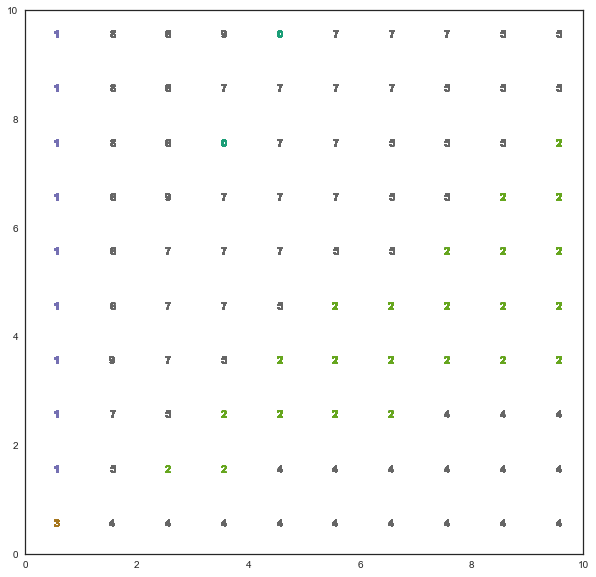

In [65]:
plt.figure(figsize=(10, 10))
wmap = {}
im = 0
for x, t in zip(df_matrix, labels_d_1_3):  # scatterplot
    w = som1_3.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.Dark2(t / 4.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som1_3.get_weights().shape[0], 0,  som1_3.get_weights().shape[1]])
plt.show()